In [2]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import platform
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

선형 모델은 분류에서도 사용된다. 이진 분류를 위한 선형 모델 방정식은 다음과 같다.
- $\hat{y} = w[0]*x[0] + w[1]*x[1] + ... + w[p]*x[p] + b > 0$

선형 회귀와 비슷한데, **`임계치`**를 설정하여 **임계치 보다 크거나 작은 경우 두가지로 나누어 예측**한다.

즉, **`이진 선형 분류기`**는 **선, 평명, 초평면을 사용해 두 개의 클래스를 구분하는 분류기**라고 생각하면 된다.

- 주로 쓰이는 이진 선형 분류기
    - Logistic Regression
        - 이진 분류 : logistic 손실 함수 사용
        - 다중 분류 : cross-entropy 손실 함수 사용
    - Support Vector Machine
        - squred hinge 손실 함수 사용
    - 두 모델 전부 $L2$ 규제를 사용

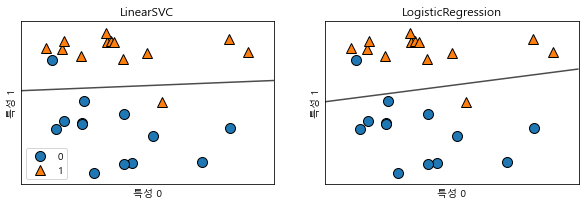

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()

- 각 모델의 규제의 강도를 줄이는 변수 : C
    - C값을 높이면 규제가 감소 => train에 최대한 가깝게 맞춘다.
    - C값이 낮아지면 규제가 증가 => 데이터 포인터 다수에 맞춘다.

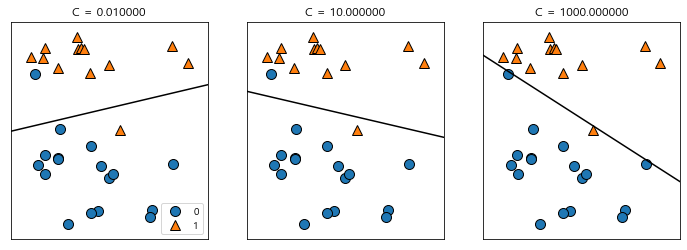

In [4]:
mglearn.plots.plot_linear_svc_regularization()

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.958


In [6]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.972
테스트 세트 점수 : 0.965


In [7]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수 : 0.934
테스트 세트 점수 : 0.930


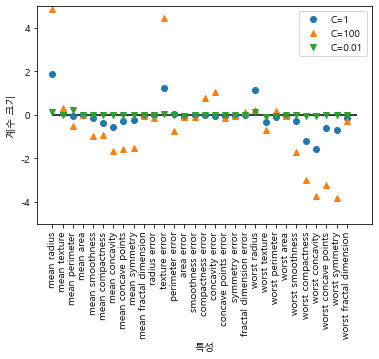

In [8]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

위의 그림을 보면 C의 값이 낮아짐에 따라 규제가 강하게 되어 특성의 계수 값이 0에 가까워 지는 것을 볼 수 있다. 릿지 회귀와 비슷한 양상이다.

C=0.001 인 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000 인 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000 인 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000 인 로지스틱 회귀의 테스트 정확도 : 0.98


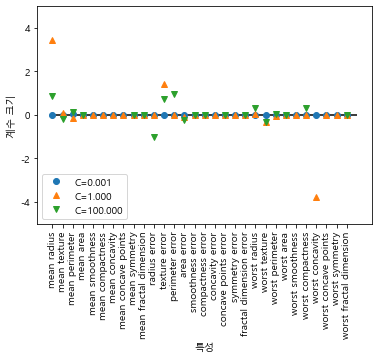

In [9]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

위 그림은 $L1$ 규제를 사용한 Logistic Regression이다. C값이 낮아짐으로 규제가 강해져 계수의 값이 0이 되는 것을 볼 수 있다. 라쏘 회귀와 유사한 양상이다.

#### penalty 파라미터를 활용해 전체 특성을 사용하는 $L2$ 규제를 사용 할지, 일부 특성만을 사용하는 $L1$규제를 사용할지 결정할 수 있다.